# 0.0 Imports

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets as dt
from sklearn import linear_model as lm

# 1.0 Load Data

In [69]:
n_samples = 100
n_outliers = 5
n_features = 1

X, y, coef = dt.make_regression(
            n_samples=n_samples,
            n_features = n_features,
            n_informative = 1,
            noise = 10,
            coef = True,
            random_state = 0
)

# add outliers
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, n_features))
y[:n_outliers] = -3 + 10 * np.random.normal(size=(n_outliers))


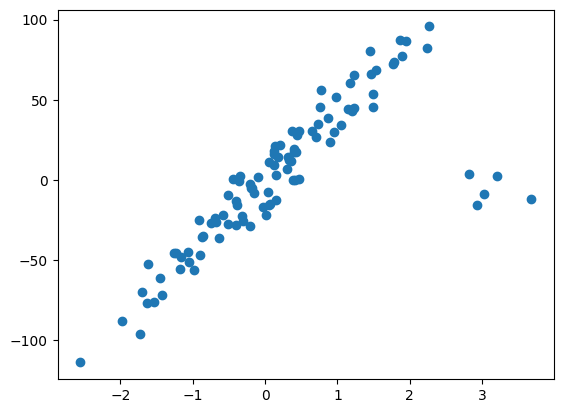

In [70]:
plt.scatter(X, y)

# 2.0 Modeling

In [71]:
# Linear Regression
lr = lm.LinearRegression()
lr.fit(X, y)

# Lasso - L1 (tende a zerar o parametros)
lasso = lm.Lasso(alpha=20)
lasso.fit(X, y)

# Ridge - L2(smooothing - amenização dos parametros)
ridge = lm.Ridge(alpha=20)
ridge.fit(X, y)

# Elasticnet - L1/L2
elastic_ner = lm.ElasticNet(alpha=20)
elastic_ner.fit(X, y)

# Ransac
ransac = lm.RANSACRegressor()
ransac.fit(X, y)
inliner = ransac.inlier_mask_
outlier = np.logical_not( ransac.inlier_mask_)

# 3.0 Predict

In [72]:
X_plot = np.arange(X.min(), X.max())[:, np.newaxis]

yhat_linear_model = lr.predict(X_plot)
yhat_lasso = lasso.predict(X_plot)
yhat_ridge = ridge.predict(X_plot)
yhat_elastic_net = elastic_ner.predict(X_plot)
yhat_ransac = ransac.predict(X_plot)


# 4.0 Graphs

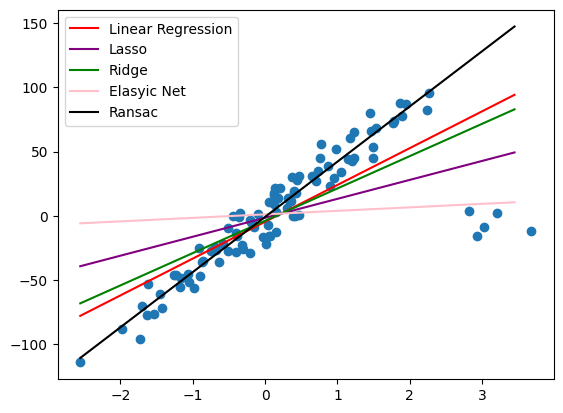

In [73]:
#plt.scatter(X[inliner], y[inliner], color='orange')
#plt.scatter(X[outlier], y[outlier], color='blue')


plt.scatter(X, y)
plt.plot(X_plot, yhat_linear_model, color='red', label='Linear Regression')
plt.plot(X_plot, yhat_lasso, color='purple', label='Lasso')
plt.plot(X_plot, yhat_ridge, color='green', label='Ridge')
plt.plot(X_plot, yhat_elastic_net, color='pink', label='Elasyic Net')
plt.plot(X_plot, yhat_ransac, color='black', label='Ransac')



plt.legend()

In [74]:
coef

array(42.38550486)

In [75]:
print(f'Linear Regression: {lr.coef_}')
print(f'Lasso: {lasso.coef_}')
print(f'Ridge: {ridge.coef_} ')
print(f'Elastic Net: {elastic_ner.coef_}')
print(f'Ransac: {ransac.estimator_.coef_}' )

Linear Regression: [28.66958223]
Lasso: [14.75906461]
Ridge: [25.16851194] 
Elastic Net: [2.72955587]
Ransac: [42.99721924]
